In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt

In [5]:
# Import data
df = pd.read_csv('C:\\Users\\jean1\\PycharmProjects\\pythonProject\\MSFT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,222.529999,223.000000,214.809998,217.690002,217.189774,37130100
1,2021-01-05,217.259995,218.520004,215.699997,217.899994,217.399292,23823000
2,2021-01-06,212.169998,216.490005,211.940002,212.250000,211.762268,35930700
3,2021-01-07,214.039993,219.339996,213.710007,218.289993,217.788391,27694500
4,2021-01-08,218.679993,220.580002,217.029999,219.619995,219.115341,22956200


In [17]:
# convertion of dates --> number of days (dates cannot be passed directly to any regression model)
type(df['Date'])
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']
df.index = (df.index - pd.to_datetime('1970-01-01')).days

In [19]:
# Convert the pandas series into numpy array, we need to further massage it before sending it to regression model
y = np.asarray(df['Close'])
x = np.asarray(df.index.values)

In [24]:
regression_model = LinearRegression()
regression_model.fit(x.reshape(-1, 1), y.reshape(-1, 1))
y_learned = regression_model.predict(x.reshape(-1, 1))
newindex = np.asarray(pd.RangeIndex(start=x[-1], stop=x[-1] + 3650))
y_predict = regression_model.predict(newindex.reshape(-1, 1))

In [25]:
print("Closing price at 2029 would be around ", y_predict[-1])

Closing price at 2029 would be around  [2540.33113775]


In [26]:
x = pd.to_datetime(df.index, origin='1970-01-01', unit='D')
future_x = pd.to_datetime(newindex, origin='1970-01-01', unit='D')

In [27]:
from matplotlib.pylab import rcParams

In [28]:
rcParams['figure.figsize'] = 20, 10

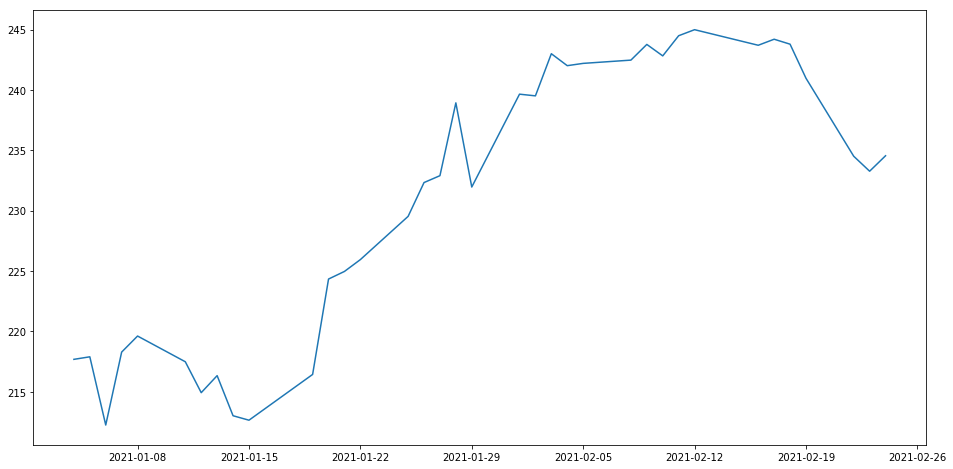

In [30]:
plt.figure(figsize=(16, 8))
plt.plot(x, df['Close'], label='Close Price History')

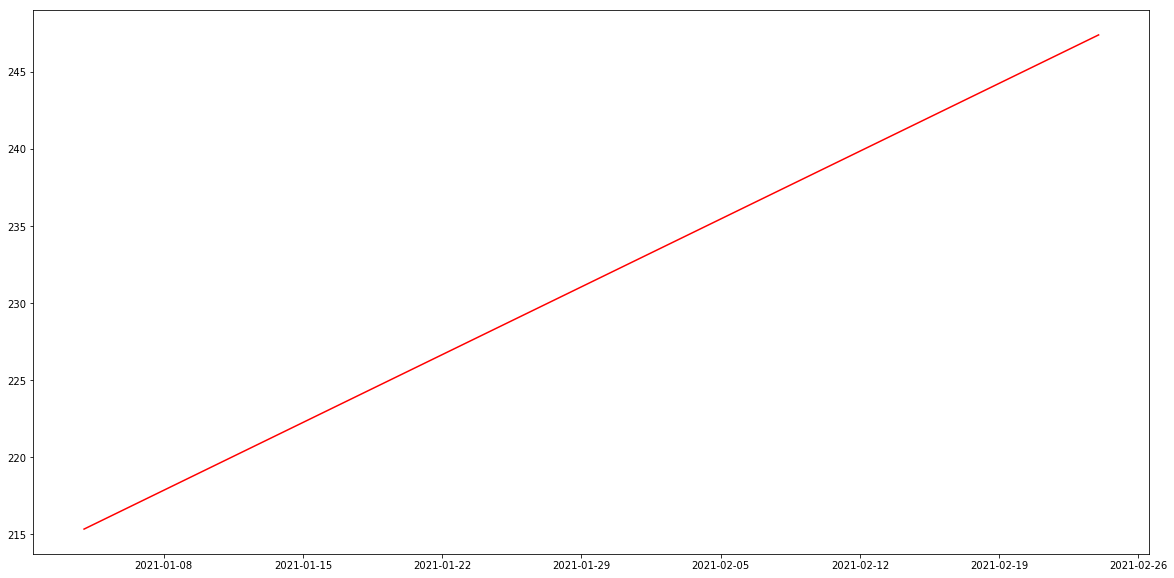

In [31]:
# plot the regression model
plt.plot(x, y_learned, color='r', label='Mathematical Model')

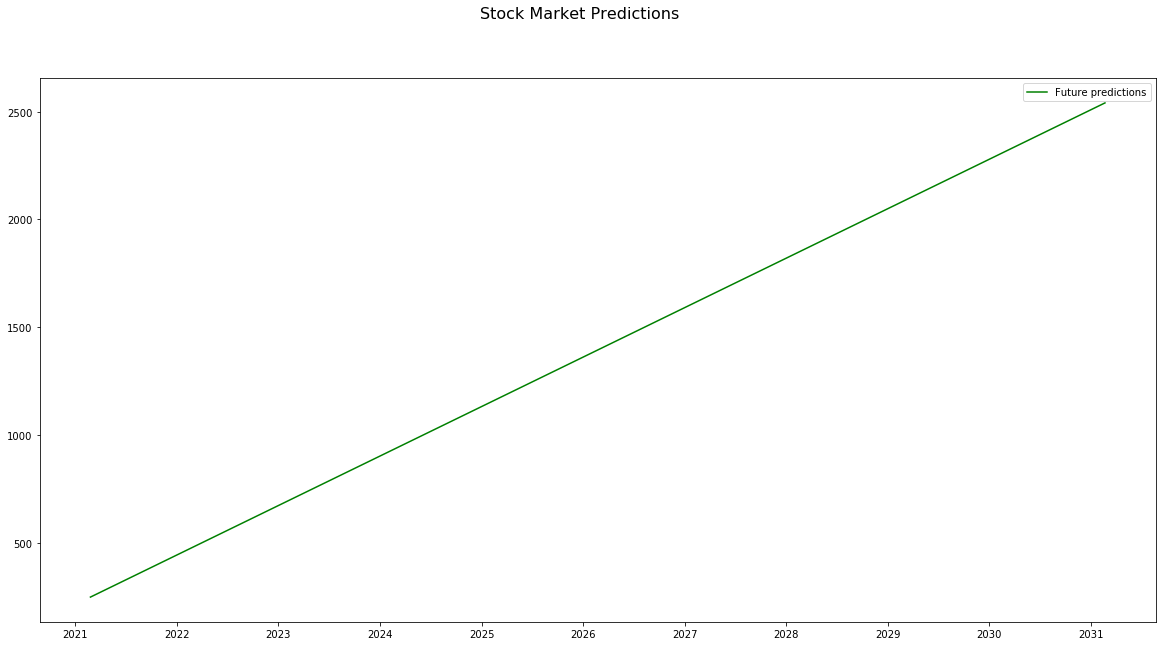

In [37]:
# plot the future predictions
plt.plot(future_x, y_predict, color='g', label='Future predictions')
plt.suptitle('Stock Market Predictions', fontsize=16)

fig = plt.gcf()
fig.canvas.set_window_title('Stock Market Predictions')

plt.legend()
plt.show()
